In [1]:
# 📦 Step 1: Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import re  # For regular expressions (text processing)
import string  # For string manipulation
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization

from sklearn.model_selection import train_test_split  # To split dataset into training and test sets
from sklearn.feature_extraction.text import TfidfVectorizer  # To convert text data into TF-IDF feature vectors
from sklearn.naive_bayes import MultinomialNB  # The Naive Bayes model for classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # To evaluate model performance

import nltk  # Natural Language Toolkit for text preprocessing
from nltk.corpus import stopwords  # Common words to ignore in text data
from nltk.stem import PorterStemmer  # Tool for stemming words (reducing to root form)

nltk.download('stopwords')  # Download stopwords from NLTK

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# 📂 Step 2: Load the dataset
data = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [3]:
# Optional: View data types
print(data.dtypes)

review       object
sentiment    object
dtype: object


In [4]:
# Preview the data
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
# 🧾 Step 3: Explore the data
print("Dataset shape:", data.shape)  # Show number of rows and columns
print("Label distribution:\n", data['sentiment'].value_counts())  # Count how many positive and negative reviews there are


Dataset shape: (50000, 2)
Label distribution:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


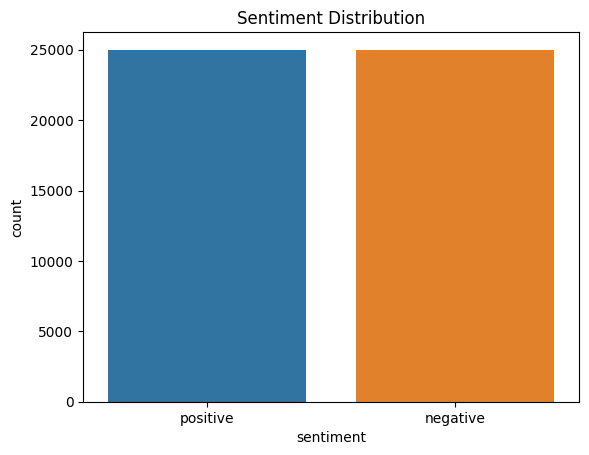

In [6]:
# Optional: Plot sentiment distribution
sns.countplot(x='sentiment', data=data)  # Create a bar plot showing the count of each sentiment label (positive/negative)
plt.title("Sentiment Distribution")  # Set the title of the plot
plt.show()  # Display the plot

In [7]:
# 🧼 Step 4: Clean the text data

stop_words = set(stopwords.words('english'))  # Load the list of common English stopwords (e.g., "the", "is", "and")
stemmer = PorterStemmer()  # Initialize the Porter stemmer for reducing words to their root form

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)  # Use regex to remove HTML-like tags from the text
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove all punctuation marks
    # Lowercase
    text = text.lower()  # Convert all text to lowercase for consistency
    # Tokenize and remove stopwords
    words = text.split()  # Split the text into individual words (tokens)
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Remove stopwords and apply stemming
    return ' '.join(words)  # Rejoin the words into a cleaned single string

# Apply cleaning to each review
data['clean_review'] = data['review'].apply(clean_text)  # Create a new column with the cleaned version of each review


In [8]:
# 🏷️ Step 5: Encode labels (positive=1, negative=0)
data['label'] = data['sentiment'].map({'positive': 1, 'negative': 0})  # Convert text labels into numeric: 'positive' → 1, 'negative' → 0

In [9]:
# 🔀 Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    data['clean_review'], data['label'], test_size=0.2, random_state=42)
    # Split the cleaned reviews (X) and labels (y) into training and test sets.
    # 80% of the data goes into training, 20% into testing.
    # random_state=42 ensures reproducibility.

print(f"Training samples: {len(X_train)}")  # Print the number of training examples
print(f"Test samples: {len(X_test)}")  # Print the number of testing examples

Training samples: 40000
Test samples: 10000


In [10]:
# ✏️ Step 7: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  
# Initialize a TF-IDF vectorizer to convert text into numeric feature vectors.
# max_features=5000 means only the top 5000 most important words will be kept.

X_train_tfidf = vectorizer.fit_transform(X_train)  
# Learn the vocabulary from the training data and transform it into TF-IDF vectors.

X_test_tfidf = vectorizer.transform(X_test)  
# Transform the test data using the same vocabulary learned from training.

In [11]:
# 🤖 Step 8: Train the Naive Bayes classifier
model = MultinomialNB()  
# Create an instance of the Multinomial Naive Bayes classifier, suitable for discrete features like word counts or TF-IDF.

model.fit(X_train_tfidf, y_train)  
# Train (fit) the model on the TF-IDF-transformed training data and corresponding sentiment labels.

MultinomialNB()

In [12]:
# 📈 Step 9: Make predictions
y_pred = model.predict(X_test_tfidf)  
# Use the trained model to predict the sentiment labels of the test dataset.

✅ Accuracy: 0.8487

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



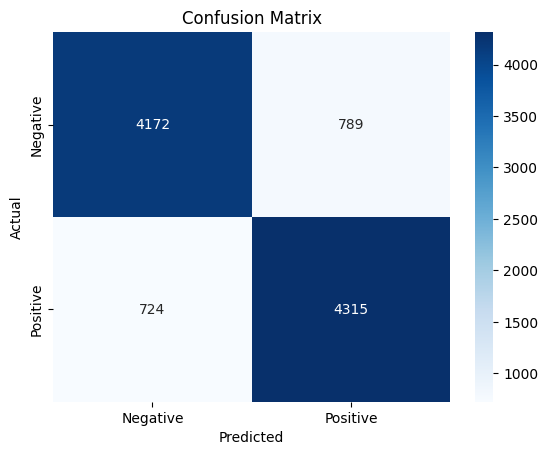

In [13]:
# 📊 Step 10: Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))  
# Print the overall accuracy of the model on the test set

print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))  
# Print detailed metrics: precision, recall, F1-score for both classes (positive and negative)

# 🔍 Step 11: Confusion matrix
cm = confusion_matrix(y_test, y_pred)  
# Compute the confusion matrix: compares actual vs predicted labels

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative','Positive'], 
            yticklabels=['Negative','Positive'])  
# Plot the confusion matrix as a heatmap with labeled axes

plt.xlabel("Predicted")  # Label for x-axis
plt.ylabel("Actual")     # Label for y-axis
plt.title("Confusion Matrix")  # Title of the plot
plt.show()  # Display the heatmap


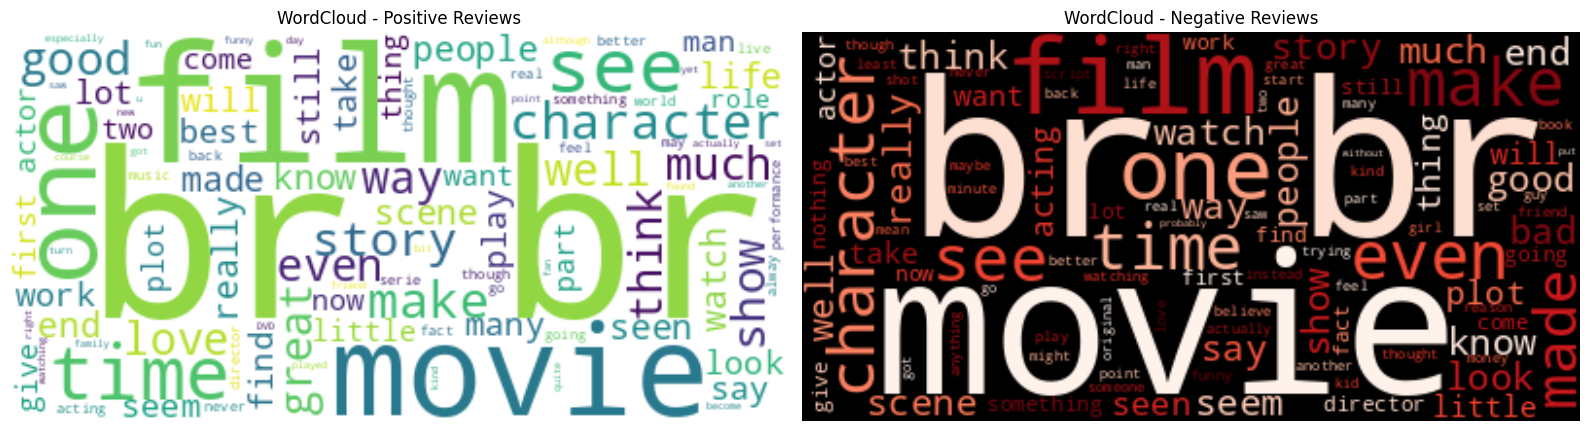

In [14]:
from wordcloud import WordCloud  # Import the WordCloud class for generating word clouds
import seaborn as sns  # Import seaborn for styling (already used earlier)

# Separate the texts
positive_text = ' '.join(data[data['sentiment'] == 'positive']['review'])  
# Concatenate all positive reviews into one large text string

negative_text = ' '.join(data[data['sentiment'] == 'negative']['review'])  
# Concatenate all negative reviews into one large text string

# Plot WordClouds
fig, ax = plt.subplots(1, 2, figsize=(16,8))  
# Create a figure with 2 subplots (side by side) for positive and negative word clouds

# Generate word clouds
wc_pos = WordCloud(background_color='white', max_words=100).generate(positive_text)  
# Create a word cloud from positive text, showing up to 100 words on a white background

wc_neg = WordCloud(background_color='black', colormap='Reds', max_words=100).generate(negative_text)  
# Create a word cloud from negative text, showing up to 100 words on a black background using a red color map

# Plot the positive word cloud
ax[0].imshow(wc_pos, interpolation='bilinear')  # Display the positive word cloud image
ax[0].axis('off')  # Hide axis lines and labels
ax[0].set_title('WordCloud - Positive Reviews')  # Add title for the first subplot

# Plot the negative word cloud
ax[1].imshow(wc_neg, interpolation='bilinear')  # Display the negative word cloud image
ax[1].axis('off')  # Hide axis lines and labels
ax[1].set_title('WordCloud - Negative Reviews')  # Add title for the second subplot

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()  # Display the figure with both word clouds


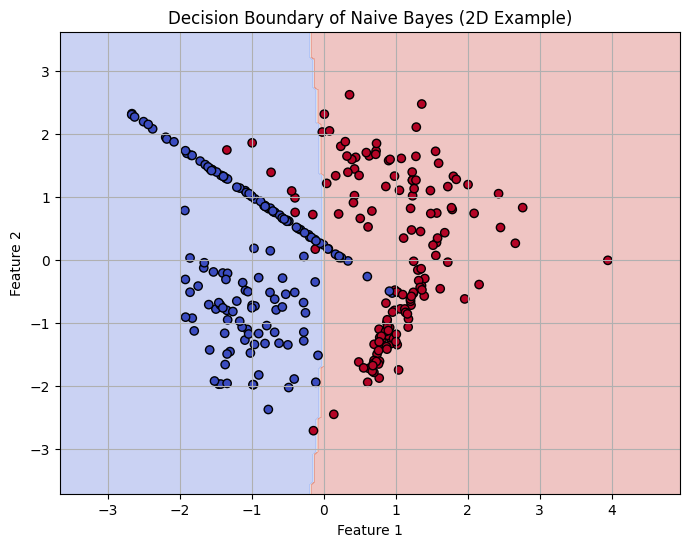

In [15]:
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes classifier
from sklearn.datasets import make_classification  # Utility to generate a synthetic classification dataset

# Simulated 2D data for demo
X_demo, y_demo = make_classification(
    n_samples=300,        # Number of samples
    n_features=2,         # Only two features (for 2D visualization)
    n_redundant=0,        # No redundant features
    n_informative=2,      # Both features carry useful information
    random_state=42       # Ensure reproducibility
)

nb = GaussianNB()  # Create an instance of Gaussian Naive Bayes
nb.fit(X_demo, y_demo)  # Train the classifier on the simulated data

# Create mesh grid for plotting decision boundary
x_min, x_max = X_demo[:, 0].min() - 1, X_demo[:, 0].max() + 1  # Range for feature 1
y_min, y_max = X_demo[:, 1].min() - 1, X_demo[:, 1].max() + 1  # Range for feature 2
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),  # Generate 200 points along x-axis
    np.linspace(y_min, y_max, 200)   # Generate 200 points along y-axis
)

Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict class for each point in the grid
Z = Z.reshape(xx.shape)  # Reshape to match the grid for plotting

plt.figure(figsize=(8,6))  # Create a figure
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  
# Draw filled contour map to visualize decision boundaries

plt.scatter(X_demo[:, 0], X_demo[:, 1], c=y_demo, cmap='coolwarm', edgecolors='k')  
# Scatter plot of original data points, colored by class

plt.title("Decision Boundary of Naive Bayes (2D Example)")  # Plot title
plt.xlabel("Feature 1")  # Label for x-axis
plt.ylabel("Feature 2")  # Label for y-axis
plt.grid(True)  # Show grid
plt.show()  # Display the final plot
